# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [57]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [59]:
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL and request your results in Celsius
query_url = f"{url}appid={weather_api_key}&q=London&units=Imperial"

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

In [60]:
weather_json

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 61.43,
  'feels_like': 61.27,
  'temp_min': 58.08,
  'temp_max': 64.18,
  'pressure': 1010,
  'humidity': 85},
 'visibility': 10000,
 'wind': {'speed': 13.8, 'deg': 70},
 'clouds': {'all': 20},
 'dt': 1627089607,
 'sys': {'type': 2,
  'id': 268730,
  'country': 'GB',
  'sunrise': 1627099957,
  'sunset': 1627156865},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [49]:
# cities_test = cities[0:60]

In [75]:
record_count = 0
set_count = 1
city_data = []
print("Beginning Data Retrieval")
print("------------------------")

for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units=Imperial"
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    record_count += 1
    if (record_count % 50== 0):
        record_count = 0
        set_count += 1 
    
    try:
        longitude = weather_json["coord"]["lon"]
        latitude = weather_json["coord"]["lat"]
        max_temp = weather_json["main"]["temp_max"]
        humidity = weather_json["main"]["humidity"]
        cloud = weather_json["clouds"]["all"]
        windiness = weather_json["wind"]["speed"]
        country = weather_json["sys"]["country"]
        date = weather_json["dt"]
        city_data.append({"City": city,
                          "Lat": latitude,
                            "Lng": longitude,
                            "Max Temp": max_temp,
                            "Humidity": humidity,
                            "Cloudiness": cloud,
                            "Wind Speed": windiness,
                            "Country": country,
                            "Date": date,
                            })
        
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
    except:
        print("City not found. Skipping...")
        record_count = record_count - 1
        pass
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")


Beginning Data Retrieval
------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | bow island
Processing Record 2 of Set 1 | ayan
Processing Record 3 of Set 1 | kruisfontein
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 6 of Set 1 | dingle
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | bratsk
Processing Record 9 of Set 1 | alofi
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | meulaboh
Processing Record 12 of Set 1 | san vicente
Processing Record 13 of Set 1 | roquetas de mar
Processing Record 14 of Set 1 | thompson
City not found. Skipping...
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | bela
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | husavik
Processing Record 19 of Set 1 | necochea
Processing Record 20 of Set 1 | acapulco
Processing Record 21 of Set 1 | college
Processi

City not found. Skipping...
Processing Record 40 of Set 4 | nyurba
Processing Record 41 of Set 4 | majholi
Processing Record 42 of Set 4 | marshfield
Processing Record 43 of Set 4 | madang
Processing Record 44 of Set 4 | lebu
Processing Record 45 of Set 4 | belaya gora
Processing Record 46 of Set 4 | haines junction
Processing Record 47 of Set 4 | keti bandar
City not found. Skipping...
Processing Record 48 of Set 4 | yellowknife
Processing Record 49 of Set 4 | atuona
Processing Record 0 of Set 5 | egra
Processing Record 1 of Set 5 | evensk
Processing Record 2 of Set 5 | esperance
Processing Record 3 of Set 5 | namibe
Processing Record 4 of Set 5 | barra
Processing Record 5 of Set 5 | vila velha
Processing Record 6 of Set 5 | biak
Processing Record 7 of Set 5 | sambava
Processing Record 8 of Set 5 | guasdualito
Processing Record 9 of Set 5 | san jose
Processing Record 10 of Set 5 | hami
Processing Record 11 of Set 5 | okato
Processing Record 12 of Set 5 | hamilton
Processing Record 13 

Processing Record 28 of Set 8 | padang
Processing Record 29 of Set 8 | belem de sao francisco
Processing Record 30 of Set 8 | palmer
Processing Record 31 of Set 8 | raton
Processing Record 32 of Set 8 | banos
Processing Record 33 of Set 8 | torbay
Processing Record 34 of Set 8 | jiangyou
Processing Record 35 of Set 8 | rehoboth
Processing Record 36 of Set 8 | bandarbeyla
Processing Record 37 of Set 8 | huangchuan
Processing Record 38 of Set 8 | nanortalik
Processing Record 39 of Set 8 | mangaldai
Processing Record 40 of Set 8 | nouadhibou
Processing Record 41 of Set 8 | morden
Processing Record 42 of Set 8 | airai
Processing Record 43 of Set 8 | antofagasta
Processing Record 44 of Set 8 | tigil
Processing Record 45 of Set 8 | saskylakh
Processing Record 46 of Set 8 | quelimane
Processing Record 47 of Set 8 | sebastian
Processing Record 48 of Set 8 | ust-tsilma
City not found. Skipping...
Processing Record 49 of Set 8 | aklavik
Processing Record 0 of Set 9 | nikel
Processing Record 1 of

Processing Record 11 of Set 12 | raudeberg
Processing Record 12 of Set 12 | kargopol
Processing Record 13 of Set 12 | rio grande
Processing Record 14 of Set 12 | tevriz
Processing Record 15 of Set 12 | manzanares
Processing Record 16 of Set 12 | narathiwat
Processing Record 17 of Set 12 | sulangan
Processing Record 18 of Set 12 | poyarkovo
Processing Record 19 of Set 12 | dongargaon
Processing Record 20 of Set 12 | malanville
Processing Record 21 of Set 12 | nabire
Processing Record 22 of Set 12 | constitucion
------------------------
Data Retrieval Complete
------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [76]:
city_df = pd.DataFrame(city_data)
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bow island,49.8668,-111.3684,85.26,33,73,6.91,CA,1627349404
1,ayan,56.4500,138.1667,72.12,53,95,5.19,RU,1627349594
2,kruisfontein,-34.0033,24.7314,68.88,27,13,18.14,ZA,1627349594
3,nikolskoye,59.7035,30.7861,60.03,73,6,3.89,RU,1627349595
4,ushuaia,-54.8000,-68.3000,33.46,86,75,3.44,AR,1627349595


In [77]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,19.473643,17.209644,69.359790,70.561189,52.580420,8.178986,1.627350e+09
std,33.201519,89.055898,13.685585,19.365001,39.626923,5.821557,8.732469e+01
min,-54.800000,-179.166700,33.460000,13.000000,0.000000,0.000000,1.627349e+09
25%,-9.030550,-59.968425,60.115000,60.000000,8.000000,4.000000,1.627350e+09
50%,21.862600,25.250900,71.375000,75.000000,55.000000,6.780000,1.627350e+09
75%,47.166700,92.181650,80.055000,86.000000,95.000000,10.960000,1.627350e+09
max,78.218600,178.416700,96.710000,100.000000,100.000000,37.020000,1.627350e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [78]:
city_df.loc[city_df["Humidity"] > 100, :]
# In this random draw of cities, there were no cities with humidity greater than 100.

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [6]:
# Skip

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.
# skip

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Skip

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

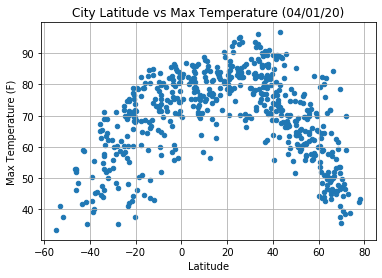

In [79]:
city_df.plot(x = "Lat", y = "Max Temp", kind = "scatter", title = "City Latitude vs Max Temperature (04/01/20)", grid = True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

## Latitude vs. Humidity Plot

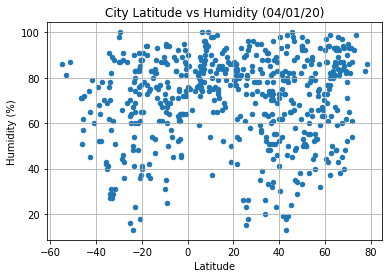

In [80]:
city_df.plot(x = "Lat", y = "Humidity", kind = "scatter", title = "City Latitude vs Humidity (04/01/20)", grid = True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

## Latitude vs. Cloudiness Plot

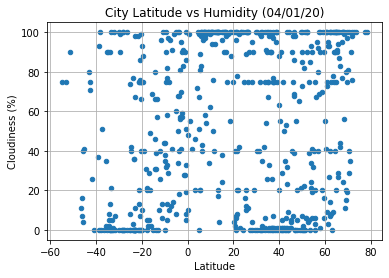

In [81]:
city_df.plot(x = "Lat", y = "Cloudiness", kind = "scatter", title = "City Latitude vs Humidity (04/01/20)", grid = True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

## Latitude vs. Wind Speed Plot

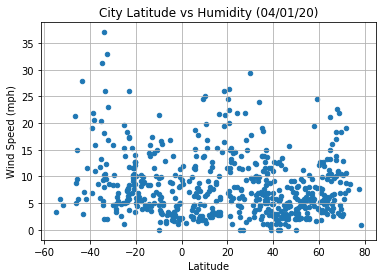

In [82]:
city_df.plot(x = "Lat", y = "Wind Speed", kind = "scatter", title = "City Latitude vs Humidity (04/01/20)", grid = True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


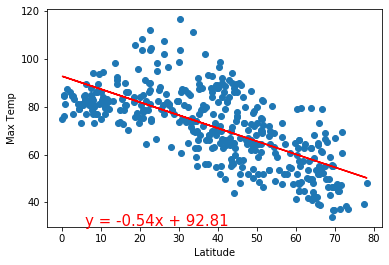

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


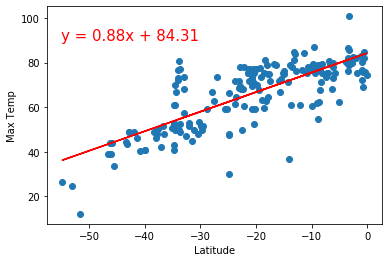

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


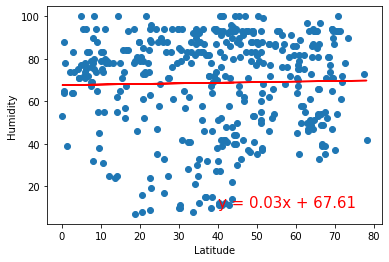

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


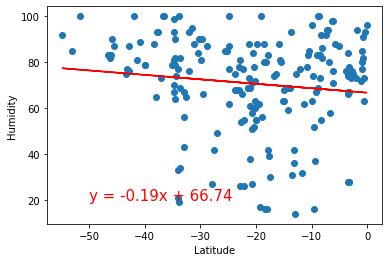

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


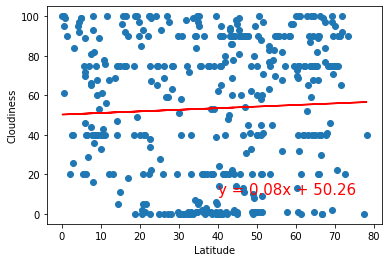

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


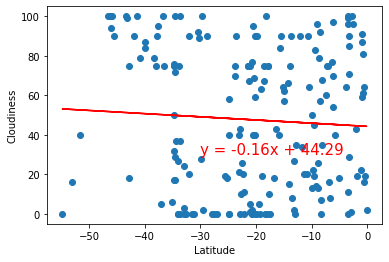

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


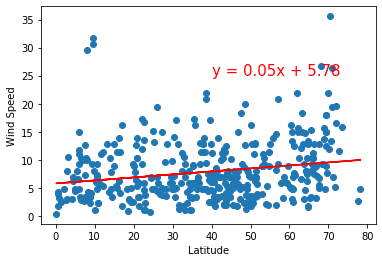

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


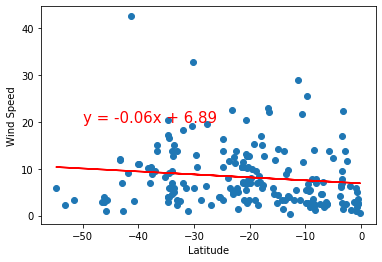